In [100]:
#importing the dataset
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

#fetching training data of 60000 and testing data of 10000
#splitting into train,test
x,y = fetch_openml('mnist_784', version=1, return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=60000, test_size=10000, shuffle=False)

xtrain = xtrain.astype(np.float)
xtest = xtest.astype(np.float)
xtrain = xtrain/255
xtest = xtest/255

#converting output to int 
ytrain = ytrain.astype(np.int)
ytest = ytest.astype(np.int)

#we are using one hot encodign for classification
ytrain = one_hot_encoding(ytrain)
yt = one_hot_encoding(ytest)

def one_hot_encoding(output, num_labels=10):
  one_h = np.zeros((output.shape[0], num_labels))
  for x, y in enumerate(output):
    one_h[x,y] = 1.0
  return one_h

In [112]:

#Activation fn chosen = Sigmoid
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


In [113]:


class mnistq(object):

    def __init__(self, num_hidden, epoch=40, alpha=0.01):
        self.epoch = epoch 
        self.alpha = alpha #learning rate
        self.input_size = 784 
        self.output_size = 10 
        self.hidden = num_hidden #neurons in the hidden layer - given below
        
        print('Initialized with random W')
        print('********************')
        self.weight1 = np.random.normal(0, 0.2, [self.input_size, self.hidden]) #weights in the first layer between input and hidden
        self.bias1 = np.zeros((1, self.hidden)) # bias for weight 1
        self.weight2 = np.random.normal(0, 0.2, [self.hidden, self.output_size]) #weights in the second layer between hidden and output
        self.bias2 = np.zeros((1, self.output_size))  # bias for weight 2
      
    #Used to train the network - takes the training input and output, and batch value
    def train(self, training_inputs, training_outputs,xtest, yt, batch):
      
        print('Training with a '+str(batch)+' batch size')
        print('********************')   
        #momentum value
        beta = 0.3
        #intializing previous gradients 
        prev_grad_w2 = 0
        prev_grad_w1 = 0
        
        #for the number of epochs specified
        pbar = tqdm(range(self.epoch))
        for k in pbar:           
            it = 0
            avg_error = 0
            while it < training_inputs.shape[0]:

                #take the batch size of inputs and outputs
                tx = training_inputs[it:it+batch]
                ty = training_outputs[it:it+batch]

                 # Forward propogation
                z1 = np.dot(tx, self.weight1) + self.bias1
                a1 = sigmoid(z1)
                z2 = np.dot(a1, self.weight2) + self.bias2
                y = sigmoid(z2)

                #Backpropogation and error calculation
                dy2 = y*(1-y) #derivative of final output
                dy1 = a1*(1-a1) #derivative of hidden layer output
                output_error = np.subtract(ty,y) #error in output layer
                avg_error += np.mean(output_error)
                output_delta = output_error * dy2 #element wise mulitplication
                hidden_error = np.dot(output_delta, self.weight2.T)
                hidden_layer_delta = hidden_error * dy1 #element wise multiplication

                # using momentum, beta set to 0.3
                momentum_factor_w1 = beta * prev_grad_w1
                momentum_factor_w2 = beta * prev_grad_w2

                #Backpropogation calculation of each weight and bias
                dW2 = np.dot(a1.T, output_delta) # forward * backward
                db2 = np.sum(output_delta, axis = 0, keepdims = True)
                dW1 = np.dot(tx.T, hidden_layer_delta)
                db1 = np.sum(hidden_layer_delta, axis = 0, keepdims = True)


                #update weights and bias
                self.weight2 += (1./batch * self.alpha * dW2) + momentum_factor_w2
                self.bias2 +=  1./batch * self.alpha * db2
                self.weight1 +=  (1./batch * self.alpha * dW1) + momentum_factor_w1 
                self.bias1 +=  1./batch * self.alpha * db1

                #save the graident to use in next batch iteration
                prev_grad_w1 = 1./batch * self.alpha * dW1
                prev_grad_w2 = 1./batch * self.alpha * dW2

                #input("Wait")

                #increment to access next set of inputs
                it = it + batch
                
            avg_error /= float(training_inputs.shape[0])
            pbar.set_description("Error: %.4f" %(avg_error))
            print("Training acc at epoch:",k)
            trainacc = self.test(training_inputs, training_outputs)
            print("Pred acc at epoch:",k)
            predicacc = self.test(xtest, yt)
            prederr.append((1-(predicacc/100)))
            trainerr.append(1-(trainacc/100))
            
            

  # accuracy testing - for training and testing
    def test(self, test_input, test_output):
        
        #forward feed
        z1 = np.dot(test_input, self.weight1) + self.bias1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, self.weight2) + self.bias2
        y = sigmoid(z2)

        a = np.zeros((10000, 1))

        # To see how accurate the neural network is compared to the correct values
        acc = 0.0
        for i in range(10000):
            if np.argmax(y[i]) == np.argmax(test_output[i]):
                acc += 1
                a[i] = np.argmax(y[i])
        accper = acc / 10000 * 100
        print( accper, "%")
        return accper
    


In [114]:
#driver func
trainerr = []
prederr = []
mnt = mnistq(128)
#Training
mnt.train(xtrain,ytrain,xtest, yt,4)
print("Final accuracy of test data")
prediction = mnt.test(xtest, yt)

Initialized with random W
********************
Training with a 4 batch size
********************





  0%|                                                                                           | 0/40 [00:00<?, ?it/s]


Error: -0.0066:   0%|                                                                           | 0/40 [00:09<?, ?it/s]

Training acc at epoch: 0
84.78999999999999 %
Pred acc at epoch: 0
85.77 %





Error: -0.0066:   2%|█▋                                                                 | 1/40 [00:10<06:44, 10.37s/it]


Error: -0.0038:   2%|█▋                                                                 | 1/40 [00:19<06:44, 10.37s/it]

Training acc at epoch: 1
87.82 %
Pred acc at epoch: 1
88.5 %





Error: -0.0038:   5%|███▎                                                               | 2/40 [00:20<06:30, 10.28s/it]


Error: -0.0025:   5%|███▎                                                               | 2/40 [00:30<06:30, 10.28s/it]

Training acc at epoch: 2
89.34 %
Pred acc at epoch: 2
89.69 %





Error: -0.0025:   8%|█████                                                              | 3/40 [00:30<06:20, 10.30s/it]


Error: -0.0019:   8%|█████                                                              | 3/40 [00:39<06:20, 10.30s/it]

Training acc at epoch: 3
90.10000000000001 %
Pred acc at epoch: 3
90.38000000000001 %





Error: -0.0019:  10%|██████▋                                                            | 4/40 [00:40<06:05, 10.14s/it]


Error: -0.0016:  10%|██████▋                                                            | 4/40 [00:50<06:05, 10.14s/it]

Training acc at epoch: 4
90.68 %
Pred acc at epoch: 4
91.0 %





Error: -0.0016:  12%|████████▍                                                          | 5/40 [00:51<06:01, 10.33s/it]


Error: -0.0013:  12%|████████▍                                                          | 5/40 [01:02<06:01, 10.33s/it]

Training acc at epoch: 5
91.16 %
Pred acc at epoch: 5
91.23 %





Error: -0.0013:  15%|██████████                                                         | 6/40 [01:03<06:05, 10.75s/it]


Error: -0.0012:  15%|██████████                                                         | 6/40 [01:18<06:05, 10.75s/it]

Training acc at epoch: 6
91.38 %
Pred acc at epoch: 6
91.66 %





Error: -0.0012:  18%|███████████▋                                                       | 7/40 [01:19<06:49, 12.40s/it]


Error: -0.0010:  18%|███████████▋                                                       | 7/40 [01:33<06:49, 12.40s/it]

Training acc at epoch: 7
91.78 %
Pred acc at epoch: 7
92.0 %





Error: -0.0010:  20%|█████████████▍                                                     | 8/40 [01:34<07:05, 13.31s/it]


Error: -0.0010:  20%|█████████████▍                                                     | 8/40 [01:47<07:05, 13.31s/it]

Training acc at epoch: 8
92.03 %
Pred acc at epoch: 8
92.22 %





Error: -0.0010:  22%|███████████████                                                    | 9/40 [01:48<06:54, 13.36s/it]


Error: -0.0009:  22%|███████████████                                                    | 9/40 [01:57<06:54, 13.36s/it]

Training acc at epoch: 9
92.17999999999999 %
Pred acc at epoch: 9
92.53 %





Error: -0.0009:  25%|████████████████▌                                                 | 10/40 [01:58<06:14, 12.48s/it]


Error: -0.0008:  25%|████████████████▌                                                 | 10/40 [02:10<06:14, 12.48s/it]

Training acc at epoch: 10
92.35 %
Pred acc at epoch: 10
92.78 %





Error: -0.0008:  28%|██████████████████▏                                               | 11/40 [02:11<06:03, 12.55s/it]


Error: -0.0008:  28%|██████████████████▏                                               | 11/40 [02:31<06:03, 12.55s/it]

Training acc at epoch: 11
92.64 %
Pred acc at epoch: 11
93.0 %





Error: -0.0008:  30%|███████████████████▊                                              | 12/40 [02:32<07:06, 15.25s/it]


Error: -0.0007:  30%|███████████████████▊                                              | 12/40 [02:51<07:06, 15.25s/it]

Training acc at epoch: 12
92.9 %
Pred acc at epoch: 12
93.24 %





Error: -0.0007:  32%|█████████████████████▍                                            | 13/40 [02:52<07:29, 16.63s/it]


Error: -0.0007:  32%|█████████████████████▍                                            | 13/40 [03:07<07:29, 16.63s/it]

Training acc at epoch: 13
93.06 %
Pred acc at epoch: 13
93.35 %





Error: -0.0007:  35%|███████████████████████                                           | 14/40 [03:08<07:05, 16.35s/it]


Error: -0.0007:  35%|███████████████████████                                           | 14/40 [03:20<07:05, 16.35s/it]

Training acc at epoch: 14
93.26 %
Pred acc at epoch: 14
93.5 %





Error: -0.0007:  38%|████████████████████████▊                                         | 15/40 [03:21<06:22, 15.31s/it]


Error: -0.0007:  38%|████████████████████████▊                                         | 15/40 [03:35<06:22, 15.31s/it]

Training acc at epoch: 15
93.41000000000001 %
Pred acc at epoch: 15
93.67 %





Error: -0.0007:  40%|██████████████████████████▍                                       | 16/40 [03:36<06:05, 15.21s/it]


Error: -0.0006:  40%|██████████████████████████▍                                       | 16/40 [03:51<06:05, 15.21s/it]

Training acc at epoch: 16
93.63 %
Pred acc at epoch: 16
93.84 %





Error: -0.0006:  42%|████████████████████████████                                      | 17/40 [03:52<05:55, 15.47s/it]


Error: -0.0006:  42%|████████████████████████████                                      | 17/40 [04:05<05:55, 15.47s/it]

Training acc at epoch: 17
93.78 %
Pred acc at epoch: 17
93.92 %





Error: -0.0006:  45%|█████████████████████████████▋                                    | 18/40 [04:06<05:30, 15.04s/it]


Error: -0.0006:  45%|█████████████████████████████▋                                    | 18/40 [04:18<05:30, 15.04s/it]

Training acc at epoch: 18
93.89 %
Pred acc at epoch: 18
94.01 %





Error: -0.0006:  48%|███████████████████████████████▎                                  | 19/40 [04:18<04:58, 14.21s/it]


Error: -0.0006:  48%|███████████████████████████████▎                                  | 19/40 [04:32<04:58, 14.21s/it]

Training acc at epoch: 19
94.02000000000001 %
Pred acc at epoch: 19
94.08999999999999 %





Error: -0.0006:  50%|█████████████████████████████████                                 | 20/40 [04:33<04:48, 14.44s/it]


Error: -0.0006:  50%|█████████████████████████████████                                 | 20/40 [04:51<04:48, 14.44s/it]

Training acc at epoch: 20
94.17 %
Pred acc at epoch: 20
94.23 %





Error: -0.0006:  52%|██████████████████████████████████▋                               | 21/40 [04:52<04:57, 15.64s/it]


Error: -0.0006:  52%|██████████████████████████████████▋                               | 21/40 [05:04<04:57, 15.64s/it]

Training acc at epoch: 21
94.27 %
Pred acc at epoch: 21
94.31 %





Error: -0.0006:  55%|████████████████████████████████████▎                             | 22/40 [05:04<04:25, 14.75s/it]


Error: -0.0006:  55%|████████████████████████████████████▎                             | 22/40 [05:20<04:25, 14.75s/it]

Training acc at epoch: 22
94.48 %
Pred acc at epoch: 22
94.39 %





Error: -0.0006:  57%|█████████████████████████████████████▉                            | 23/40 [05:21<04:19, 15.28s/it]


Error: -0.0006:  57%|█████████████████████████████████████▉                            | 23/40 [05:31<04:19, 15.28s/it]

Training acc at epoch: 23
94.57 %
Pred acc at epoch: 23
94.5 %





Error: -0.0006:  60%|███████████████████████████████████████▌                          | 24/40 [05:32<03:45, 14.09s/it]


Error: -0.0005:  60%|███████████████████████████████████████▌                          | 24/40 [05:45<03:45, 14.09s/it]

Training acc at epoch: 24
94.64 %
Pred acc at epoch: 24
94.57 %





Error: -0.0005:  62%|█████████████████████████████████████████▎                        | 25/40 [05:47<03:34, 14.30s/it]


Error: -0.0005:  62%|█████████████████████████████████████████▎                        | 25/40 [06:00<03:34, 14.30s/it]

Training acc at epoch: 25
94.77 %
Pred acc at epoch: 25
94.64 %





Error: -0.0005:  65%|██████████████████████████████████████████▉                       | 26/40 [06:00<03:16, 14.03s/it]


Error: -0.0005:  65%|██████████████████████████████████████████▉                       | 26/40 [06:14<03:16, 14.03s/it]

Training acc at epoch: 26
94.84 %
Pred acc at epoch: 26
94.72 %





Error: -0.0005:  68%|████████████████████████████████████████████▌                     | 27/40 [06:15<03:03, 14.14s/it]


Error: -0.0005:  68%|████████████████████████████████████████████▌                     | 27/40 [06:27<03:03, 14.14s/it]

Training acc at epoch: 27
95.0 %
Pred acc at epoch: 27
94.74000000000001 %





Error: -0.0005:  70%|██████████████████████████████████████████████▏                   | 28/40 [06:27<02:44, 13.73s/it]


Error: -0.0005:  70%|██████████████████████████████████████████████▏                   | 28/40 [06:37<02:44, 13.73s/it]

Training acc at epoch: 28
95.14 %
Pred acc at epoch: 28
94.8 %





Error: -0.0005:  72%|███████████████████████████████████████████████▊                  | 29/40 [06:38<02:20, 12.80s/it]


Error: -0.0005:  72%|███████████████████████████████████████████████▊                  | 29/40 [06:49<02:20, 12.80s/it]

Training acc at epoch: 29
95.21 %
Pred acc at epoch: 29
94.85 %





Error: -0.0005:  75%|█████████████████████████████████████████████████▌                | 30/40 [06:49<02:03, 12.33s/it]


Error: -0.0005:  75%|█████████████████████████████████████████████████▌                | 30/40 [07:01<02:03, 12.33s/it]

Training acc at epoch: 30
95.26 %
Pred acc at epoch: 30
94.98 %





Error: -0.0005:  78%|███████████████████████████████████████████████████▏              | 31/40 [07:02<01:51, 12.34s/it]


Error: -0.0005:  78%|███████████████████████████████████████████████████▏              | 31/40 [07:11<01:51, 12.34s/it]

Training acc at epoch: 31
95.33 %
Pred acc at epoch: 31
95.03 %





Error: -0.0005:  80%|████████████████████████████████████████████████████▊             | 32/40 [07:12<01:33, 11.69s/it]


Error: -0.0005:  80%|████████████████████████████████████████████████████▊             | 32/40 [07:24<01:33, 11.69s/it]

Training acc at epoch: 32
95.39999999999999 %
Pred acc at epoch: 32
95.1 %





Error: -0.0005:  82%|██████████████████████████████████████████████████████▍           | 33/40 [07:25<01:24, 12.05s/it]


Error: -0.0005:  82%|██████████████████████████████████████████████████████▍           | 33/40 [07:35<01:24, 12.05s/it]

Training acc at epoch: 33
95.44 %
Pred acc at epoch: 33
95.16 %





Error: -0.0005:  85%|████████████████████████████████████████████████████████          | 34/40 [07:36<01:10, 11.71s/it]


Error: -0.0005:  85%|████████████████████████████████████████████████████████          | 34/40 [07:47<01:10, 11.71s/it]

Training acc at epoch: 34
95.52000000000001 %
Pred acc at epoch: 34
95.19999999999999 %





Error: -0.0005:  88%|█████████████████████████████████████████████████████████▊        | 35/40 [07:47<00:58, 11.67s/it]


Error: -0.0005:  88%|█████████████████████████████████████████████████████████▊        | 35/40 [07:59<00:58, 11.67s/it]

Training acc at epoch: 35
95.63000000000001 %
Pred acc at epoch: 35
95.27 %





Error: -0.0005:  90%|███████████████████████████████████████████████████████████▍      | 36/40 [08:00<00:47, 11.95s/it]


Error: -0.0005:  90%|███████████████████████████████████████████████████████████▍      | 36/40 [08:12<00:47, 11.95s/it]

Training acc at epoch: 36
95.7 %
Pred acc at epoch: 36
95.28999999999999 %





Error: -0.0005:  92%|█████████████████████████████████████████████████████████████     | 37/40 [08:12<00:36, 12.10s/it]


Error: -0.0005:  92%|█████████████████████████████████████████████████████████████     | 37/40 [08:26<00:36, 12.10s/it]

Training acc at epoch: 37
95.75 %
Pred acc at epoch: 37
95.33 %





Error: -0.0005:  95%|██████████████████████████████████████████████████████████████▋   | 38/40 [08:26<00:25, 12.72s/it]


Error: -0.0005:  95%|██████████████████████████████████████████████████████████████▋   | 38/40 [08:38<00:25, 12.72s/it]

Training acc at epoch: 38
95.78999999999999 %
Pred acc at epoch: 38
95.36 %





Error: -0.0005:  98%|████████████████████████████████████████████████████████████████▎ | 39/40 [08:39<00:12, 12.75s/it]


Error: -0.0005:  98%|████████████████████████████████████████████████████████████████▎ | 39/40 [08:50<00:12, 12.75s/it]

Training acc at epoch: 39
95.88 %
Pred acc at epoch: 39
95.39999999999999 %





Error: -0.0005: 100%|██████████████████████████████████████████████████████████████████| 40/40 [08:51<00:00, 12.46s/it]

Final accuracy of test data
95.39999999999999 %


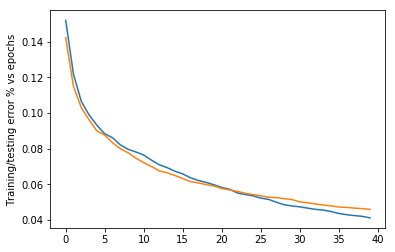

In [115]:
plt.plot(trainerr)
plt.plot(prederr)
plt.ylabel('Training/testing error % vs epochs')
plt.show()
#Training = Blus line, Testing = brown line

Learning alpha = 0.01, beta-momentum = 0.3, hidden units = 128, batch size = 4 , epochs =40